<a href="https://colab.research.google.com/github/nox1d/movie-recommendation-generator/blob/main/Movie_Recommendation_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
links = 'drive/My Drive/deep_learning_dataset/links.csv'
movies = 'drive/My Drive/deep_learning_dataset/movies.csv'
ratings = 'drive/My Drive/deep_learning_dataset/ratings.csv'
tags = 'drive/My Drive/deep_learning_dataset/tags.csv'

In [ ]:
df_movies = pd.read_csv(movies)
df_links = pd.read_csv(links)
df_ratings = pd.read_csv(ratings)
df_tags = pd.read_csv(tags)

In [ ]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
df_tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [ ]:
df_movies.shape

(9742, 3)

In [ ]:
df_movies['genres'] = df_movies['genres'].str.replace('|', ',')
df_movies['genres'] = df_movies['genres'].str.split(',')
df_movies['genres'] = df_movies['genres'].apply(lambda x: ['unassigned' if genre == '(no genres listed)' else genre for genre in x])
df_movies['genres_lower'] = df_movies['genres'].apply(lambda x: [genre.lower() for genre in x])
df_movies.head()

,movieId,title,genres,genres_lower
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]","[adventure, animation, children, comedy, fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]","[adventure, children, fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]","[comedy, romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]","[comedy, drama, romance]"
4,5,Father of the Bride Part II (1995),[Comedy],[comedy]


In [ ]:
all_genre_list = []
for genres in df_movies['genres']:
  all_genre_list.extend(genres)

print(all_genre_list)

genre_list = list(set(all_genre_list))
print(genre_list)
print(len(genre_list))

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Adventure', 'Children', 'Fantasy', 'Comedy', 'Romance', 'Comedy', 'Drama', 'Romance', 'Comedy', 'Action', 'Crime', 'Thriller', 'Comedy', 'Romance', 'Adventure', 'Children', 'Action', 'Action', 'Adventure', 'Thriller', 'Comedy', 'Drama', 'Romance', 'Comedy', 'Horror', 'Adventure', 'Animation', 'Children', 'Drama', 'Action', 'Adventure', 'Romance', 'Crime', 'Drama', 'Drama', 'Romance', 'Comedy', 'Comedy', 'Action', 'Comedy', 'Crime', 'Drama', 'Thriller', 'Comedy', 'Crime', 'Thriller', 'Crime', 'Drama', 'Horror', 'Mystery', 'Thriller', 'Action', 'Crime', 'Thriller', 'Drama', 'Sci-Fi', 'Drama', 'Romance', 'Drama', 'Children', 'Drama', 'Drama', 'Romance', 'Adventure', 'Drama', 'Fantasy', 'Mystery', 'Sci-Fi', 'Crime', 'Drama', 'Drama', 'Mystery', 'Sci-Fi', 'Thriller', 'Children', 'Drama', 'Crime', 'Drama', 'Children', 'Comedy', 'Comedy', 'Romance', 'Drama', 'Drama', 'War', 'Action', 'Crime', 'Drama', 'Drama', 'Action', 'Adventure',

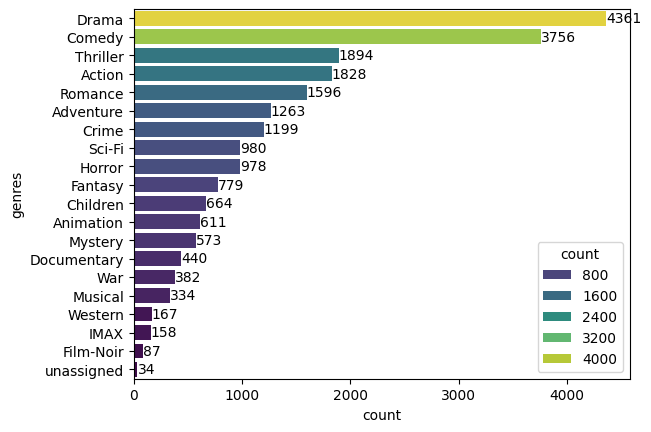

In [ ]:
genre_series = pd.Series(all_genre_list)
genre_values = pd.DataFrame(genre_series.value_counts())


genre_values = genre_values.reset_index().rename(columns={'index': 'genres'})

genre_plot = sns.barplot(data=genre_values, y='genres', x='count', palette='viridis', hue='count' )
for container in genre_plot.containers:
  genre_plot.bar_label(container)

In [ ]:
df_movies['average_rating'] = df_movies['movieId'].apply(lambda x: df_ratings.loc[df_ratings['movieId'] == x, 'rating'].median())
df_movies.head()

,movieId,title,genres,genres_lower,average_rating
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]","[adventure, animation, children, comedy, fantasy]",4.0
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]","[adventure, children, fantasy]",3.5
2,3,Grumpier Old Men (1995),"[Comedy, Romance]","[comedy, romance]",3.0
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]","[comedy, drama, romance]",3.0
4,5,Father of the Bride Part II (1995),[Comedy],[comedy],3.0


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

mlb.fit(df_movies['genres_lower'])
genre_classes = mlb.classes_
genre_classes

array(['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'film-noir', 'horror', 'imax',
       'musical', 'mystery', 'romance', 'sci-fi', 'thriller',
       'unassigned', 'war', 'western'], dtype=object)

In [ ]:
genre_encoded = mlb.fit_transform(df_movies['genres_lower'])
genre_encoded_df = pd.DataFrame(genre_encoded, columns=genre_classes)
genre_encoded_df.head()

,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film-noir,horror,imax,musical,mystery,romance,sci-fi,thriller,unassigned,war,western
0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Fit genre df using NearestNeighbors
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=5, metric='cosine')
nbrs.fit(genre_encoded_df)

NearestNeighbors(metric='cosine')

In [ ]:
# some functions to query the movies

def getRecommendations(indices):
  recommended_movies = [df_movies.iloc[i]['title'] for i in indices[0]]
  recommended_movies_genres = [df_movies.iloc[i]['genres'] for i in indices[0]]
  recommended_movies_ratings = [df_movies.iloc[i]['average_rating'] for i in indices[0]]
  return recommended_movies, recommended_movies_genres, recommended_movies_ratings

def showRecommendations(movies, genres, ratings, tags):
  print('Recommendation: ')
  for i in range(len(movies)):
    print(f"{i+1}. {movies[i]}")
    print(f"Genres: {','.join(genres[i])}")
    print(f"Average rating: {ratings[i]}")
    if len(tags[i]) == 0:
      print("No tags")
    else:
      print(f"Tags: {','.join(tags[i])}")
    print("------------------------------------")

def getTags(indices):
  movie_tags = []
  for i in indices[0]:
    id = df_movies.iloc[i]['movieId']
    movie_tags.append(df_tags.loc[df_tags['movieId'] == id, 'tag'].tolist())
  return movie_tags

In [ ]:
from IPython.display import clear_output

In [ ]:
# the final result

print("How do you want to get the recommendations?\n1. Title\n2. Genre (can be multiple genres)")
choice = input("Enter number or option: ")

if choice == '1' or choice.lower() == 'title':
  movie_titles = []
  while len(movie_titles) == 0:
    movie_input = input("Enter movie title: ")
    pattern = r'(?=.*' + r')(?=.*'.join(movie_input.split()) + r')'
    movie_titles = df_movies.loc[df_movies['title'].str.contains(pattern, case=False, regex=True), 'title']

  print("Which one?")
  for i, v in enumerate(movie_titles):
    print(i, v)

  index_input = input("Enter number: ")
  selected_movie = movie_titles.iloc[int(index_input)]
  clear_output(wait=True)
  print(f'Selected movie: {selected_movie}')
  print("------------------------------------")
  distance, indices = nbrs.kneighbors(genre_encoded_df.loc[df_movies['title'] == selected_movie])
  recommended_movies, recommended_movies_genres, recommended_movies_ratings= getRecommendations(indices)
  recommended_movies_tags = getTags(indices)
  showRecommendations(recommended_movies, recommended_movies_genres, recommended_movies_ratings, recommended_movies_tags)
elif choice == '2' or choice.lower() == 'genre':
  print(f"Genre list: {', '.join(genre_list)}")
  genre_input = input("Enter genres (can be multiple genres, separate with coma (,)): ").lower()
  clear_output(wait=True)
  print(f'Selected genres: {genre_input}')
  print("------------------------------------")

  genre_input = genre_input.replace(" ","").split(",")
  genre_input = mlb.transform([genre_input])
  genre_input_df = pd.DataFrame(genre_input, columns=genre_classes)

  distance, indices = nbrs.kneighbors(genre_input_df)
  recommended_movies, recommended_movies_genres, recommended_movies_ratings = getRecommendations(indices)
  recommended_movies_tags = getTags(indices)
  showRecommendations(recommended_movies, recommended_movies_genres, recommended_movies_ratings, recommended_movies_tags)
else:
  print("Invalid input")


Selected movie: Deadpool 2 (2018)
------------------------------------
Recommendation: 
1. Mars Attacks! (1996)
Genres: Action,Comedy,Sci-Fi
Average rating: 3.0
No tags
------------------------------------
2. Deadpool 2 (2018)
Genres: Action,Comedy,Sci-Fi
Average rating: 4.0
Tags: Josh Brolin,Ryan Reynolds,sarcasm
------------------------------------
3. Superhero Movie (2008)
Genres: Action,Comedy,Sci-Fi
Average rating: 2.0
No tags
------------------------------------
4. Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (2002)
Genres: Action,Comedy,Sci-Fi
Average rating: 3.0
Tags: crappy sequel,first was much better,sequel
------------------------------------
5. RoboGeisha (Robo-geisha) (2009)
Genres: Action,Comedy,Sci-Fi
Average rating: 3.0
No tags
------------------------------------
